
# Movie Data Analysis Notebook

This notebook contains a series of analyses performed on two datasets related to movies and awards. The analyses include trends over time, correlations, and visual insights.

### Datasets:
1. **Movies Dataset**: Contains information about movies, such as title, director, genres, IMDb scores, and user reviews.
2. **Awards Dataset**: Contains information about awards, including categories, winners, and films.

Each analysis is implemented in its own section for clarity.



## 1. Load and Explore the Datasets

We start by loading the datasets and exploring their structure to understand the available information.



In [2]:
import pandas as pd
import os

ABS_PATH = os.getcwd()
awards_df =pd.read_csv(ABS_PATH+'/data/the_oscar_award.csv')
movies_df = pd.read_csv(ABS_PATH+'/data/movie_data.csv')

# Display the first few rows of each dataset
print("Movies Dataset:")
print(movies_df.head())

print("\nAwards Dataset:")
print(awards_df.head())

Movies Dataset:
   index      director_name  duration      actor_2_name  \
0      0      James Cameron     178.0  Joel David Moore   
1      1     Gore Verbinski     169.0     Orlando Bloom   
2      2         Sam Mendes     148.0      Rory Kinnear   
3      3  Christopher Nolan     164.0    Christian Bale   
4      4        Doug Walker       NaN        Rob Walker   

                            genres     actor_1_name  \
0  Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   
1         Action|Adventure|Fantasy      Johnny Depp   
2        Action|Adventure|Thriller  Christoph Waltz   
3                  Action|Thriller        Tom Hardy   
4                      Documentary      Doug Walker   

                                         movie_title  num_voted_users  \
0                                            Avatar            886204   
1          Pirates of the Caribbean: At World's End            471220   
2                                           Spectre            275868   
3     

## 2. Genre Trends Over Time

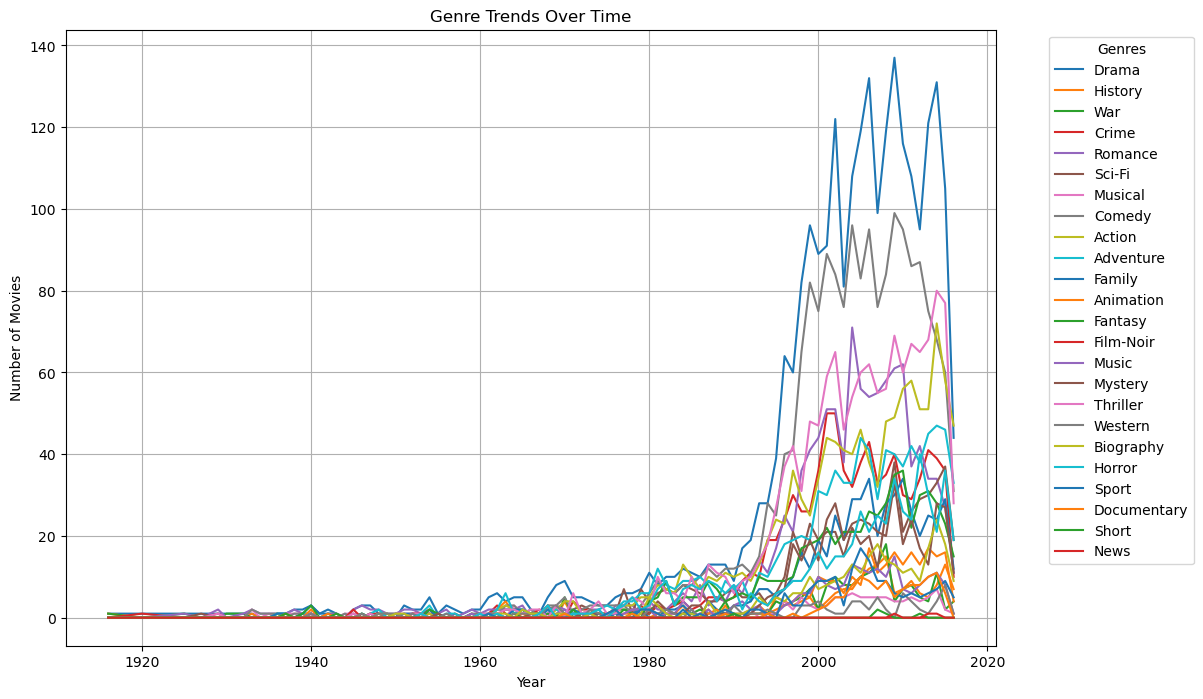

In [2]:

# Preprocess genres data
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_expanded = movies_df.explode('genres')

# Group by year and genre
genres_over_time = movies_expanded.groupby(['title_year', 'genres']).size().unstack(fill_value=0)

# Plot genre trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for genre in genres_over_time.columns:
    plt.plot(genres_over_time.index, genres_over_time[genre], label=genre)

plt.title('Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


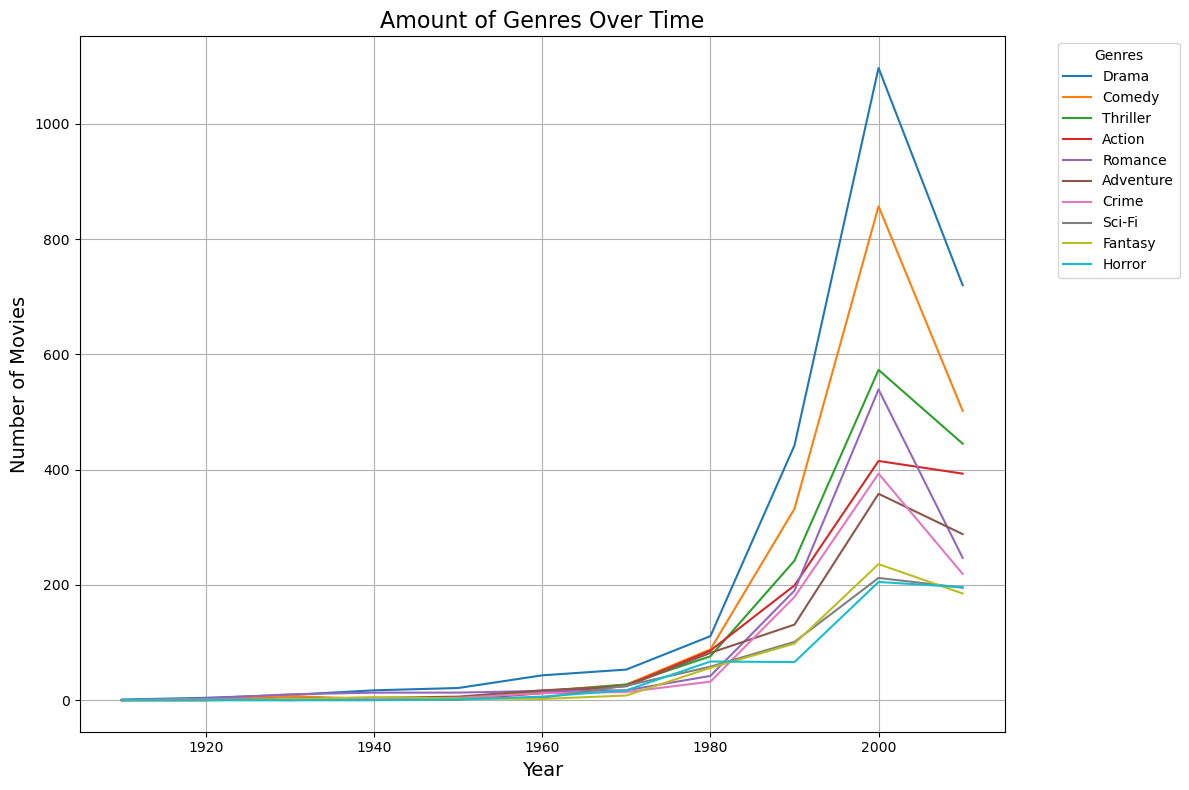

In [19]:
df = pd.read_csv(ABS_PATH+'/data/movie_data.csv')

# Preprocessing: Split genres and expand them
df['genres'] = df['genres'].str.split('|')
df_expanded = df.explode('genres')

# Round the title_year to the nearest 5 years for grouping
df_expanded['year_group'] = (df_expanded['title_year'] // 10) * 10

# Group by 5-year intervals and genre to count occurrences
genre_counts = df_expanded.groupby(['year_group', 'genres']).size().unstack(fill_value=0)

# Sum total counts across all years to identify the 10 most frequent genres
top_10_genres = genre_counts.sum().sort_values(ascending=False).head(10).index

# Filter for the top 10 genres only
genre_counts_top_10 = genre_counts[top_10_genres]

# Normalize counts by the total number of movies per 10-year group to get percentages
genre_percentages_top_10 = genre_counts_top_10.div(genre_counts_top_10.sum(axis=1), axis=0) * 100

# Plot data
plt.figure(figsize=(12, 8))
for genre in genre_counts_top_10.columns:
    plt.plot(genre_counts_top_10.index, genre_counts_top_10[genre], label=genre)

plt.title('Amount of Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

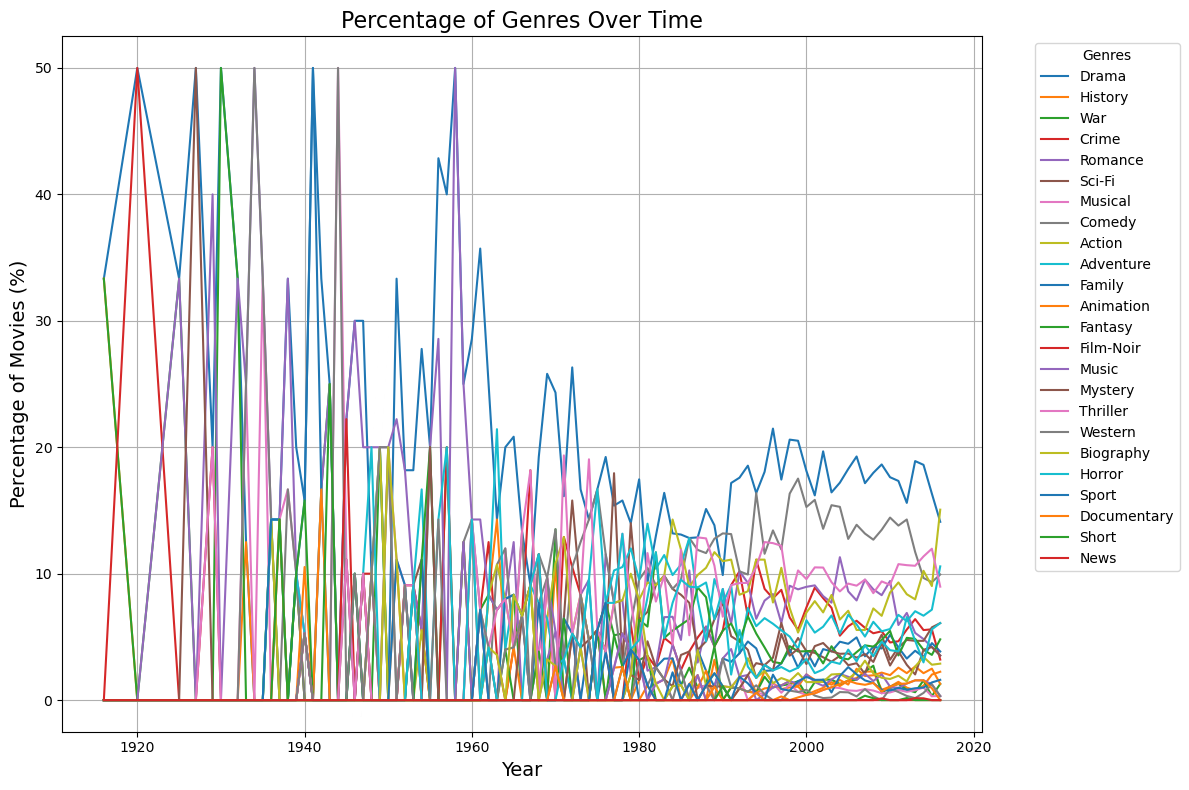

In [20]:
df = pd.read_csv(ABS_PATH+'/data/movie_data.csv')
# Preprocessing: Split genres and expand them
df['genres'] = df['genres'].str.split('|')
df_expanded = df.explode('genres')

# Group by year and genre to count occurrences
genre_counts = df_expanded.groupby(['title_year', 'genres']).size().unstack(fill_value=0)

# Normalize counts by the total number of movies per year to get percentages
genre_percentages = genre_counts.div(genre_counts.sum(axis=1), axis=0) * 100

# Plot data
plt.figure(figsize=(12, 8))
for genre in genre_percentages.columns:
    plt.plot(genre_percentages.index, genre_percentages[genre], label=genre)

plt.title('Percentage of Genres Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Movies (%)', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

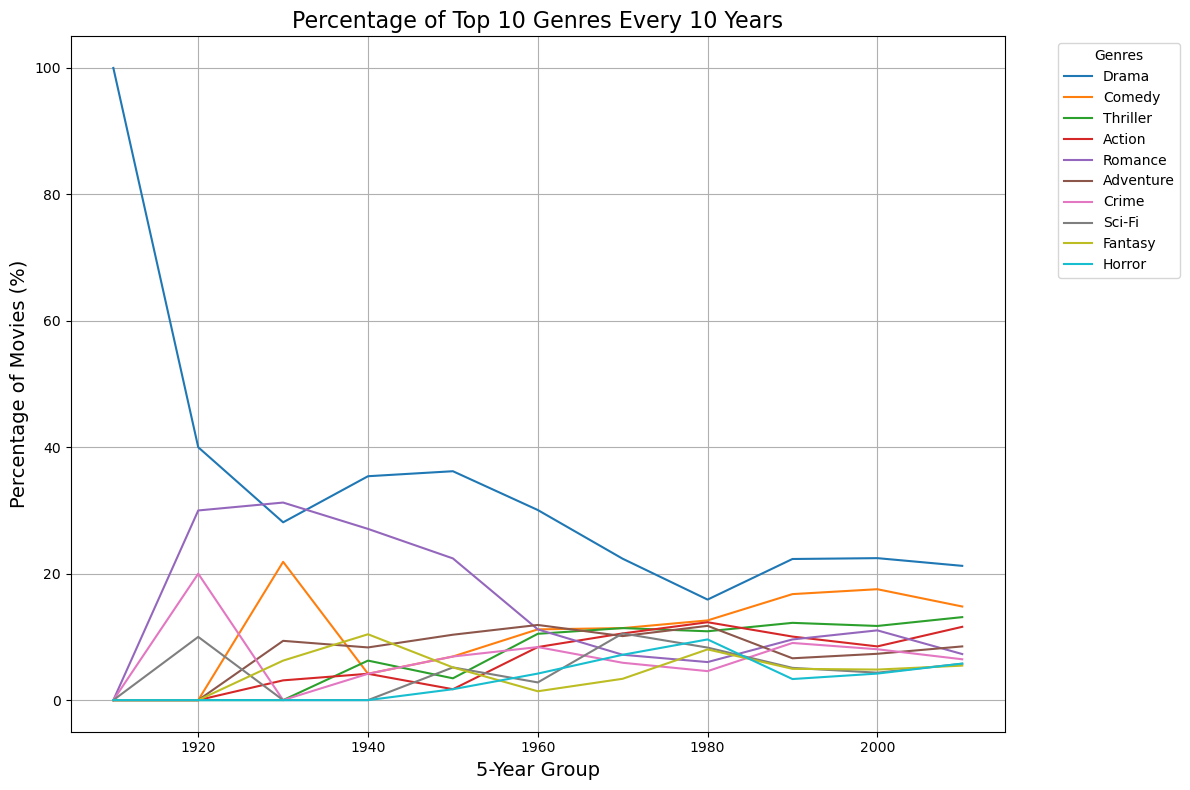

In [21]:
df = pd.read_csv(ABS_PATH+'/data/movie_data.csv')

# Preprocessing: Split genres and expand them
df['genres'] = df['genres'].str.split('|')
df_expanded = df.explode('genres')

# Round the title_year to the nearest 5 years for grouping
df_expanded['year_group'] = (df_expanded['title_year'] // 10) * 10

# Group by 5-year intervals and genre to count occurrences
genre_counts = df_expanded.groupby(['year_group', 'genres']).size().unstack(fill_value=0)

# Sum total counts across all years to identify the 10 most frequent genres
top_10_genres = genre_counts.sum().sort_values(ascending=False).head(10).index

# Filter for the top 10 genres only
genre_counts_top_10 = genre_counts[top_10_genres]

# Normalize counts by the total number of movies per 5-year group to get percentages
genre_percentages_top_10 = genre_counts_top_10.div(genre_counts_top_10.sum(axis=1), axis=0) * 100

# Plot data
plt.figure(figsize=(12, 8))
for genre in genre_percentages_top_10.columns:
    plt.plot(genre_percentages_top_10.index, genre_percentages_top_10[genre], label=genre)

plt.title('Percentage of Top 10 Genres Every 10 Years', fontsize=16)
plt.xlabel('5-Year Group', fontsize=14)
plt.ylabel('Percentage of Movies (%)', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

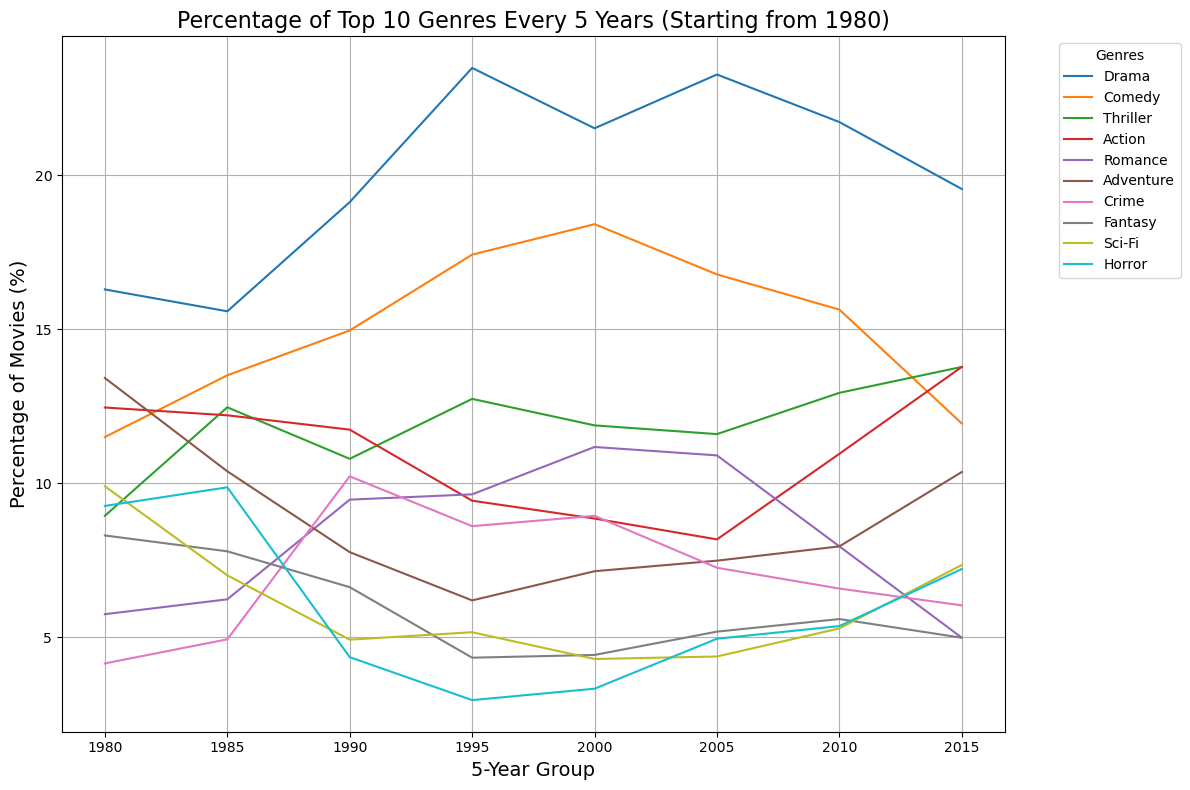

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(ABS_PATH + '/data/movie_data.csv')

# Preprocessing: Split genres and expand them
df['genres'] = df['genres'].str.split('|')
df_expanded = df.explode('genres')

# Filter data starting from 1980
df_expanded = df_expanded[df_expanded['title_year'] >= 1980]

# Round the title_year to the nearest 5 years for grouping
df_expanded['year_group'] = (df_expanded['title_year'] // 5) * 5

# Group by 5-year intervals and genre to count occurrences
genre_counts = df_expanded.groupby(['year_group', 'genres']).size().unstack(fill_value=0)

# Sum total counts across all years to identify the 10 most frequent genres
top_10_genres = genre_counts.sum().sort_values(ascending=False).head(10).index

# Filter for the top 10 genres only
genre_counts_top_10 = genre_counts[top_10_genres]

# Normalize counts by the total number of movies per 5-year group to get percentages
genre_percentages_top_10 = genre_counts_top_10.div(genre_counts_top_10.sum(axis=1), axis=0) * 100

# Plot data
plt.figure(figsize=(12, 8))
for genre in genre_percentages_top_10.columns:
    plt.plot(genre_percentages_top_10.index, genre_percentages_top_10[genre], label=genre)

plt.title('Percentage of Top 10 Genres Every 5 Years (Starting from 1980)', fontsize=16)
plt.xlabel('5-Year Group', fontsize=14)
plt.ylabel('Percentage of Movies (%)', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

## 3. Movie Duration Trends

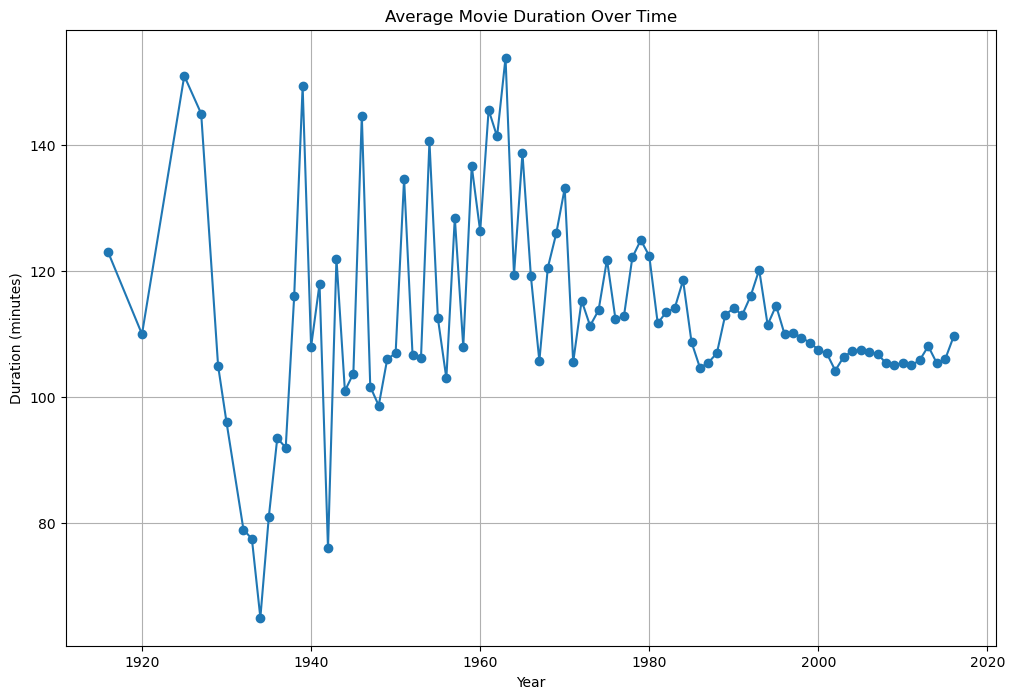

In [3]:


# Group by year and calculate average duration
duration_trends = movies_df.groupby('title_year')['duration'].mean()

# Plot the trend
plt.figure(figsize=(12, 8))
plt.plot(duration_trends.index, duration_trends.values, marker='o')
plt.title('Average Movie Duration Over Time')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.grid()
plt.show()



## 4. Evolution of IMDB scores

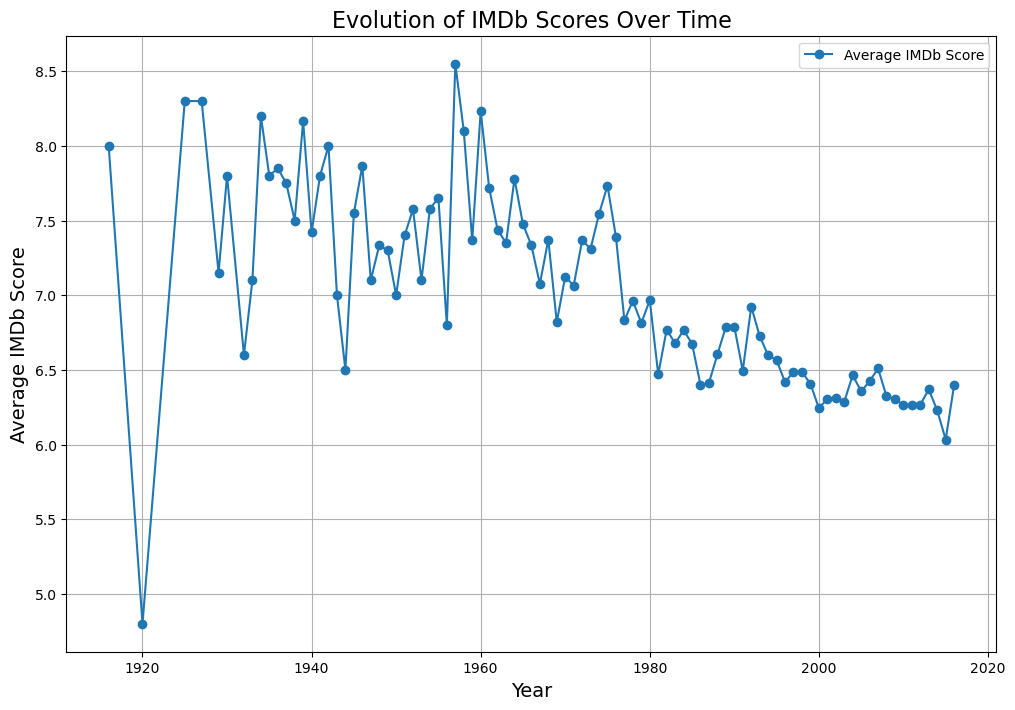

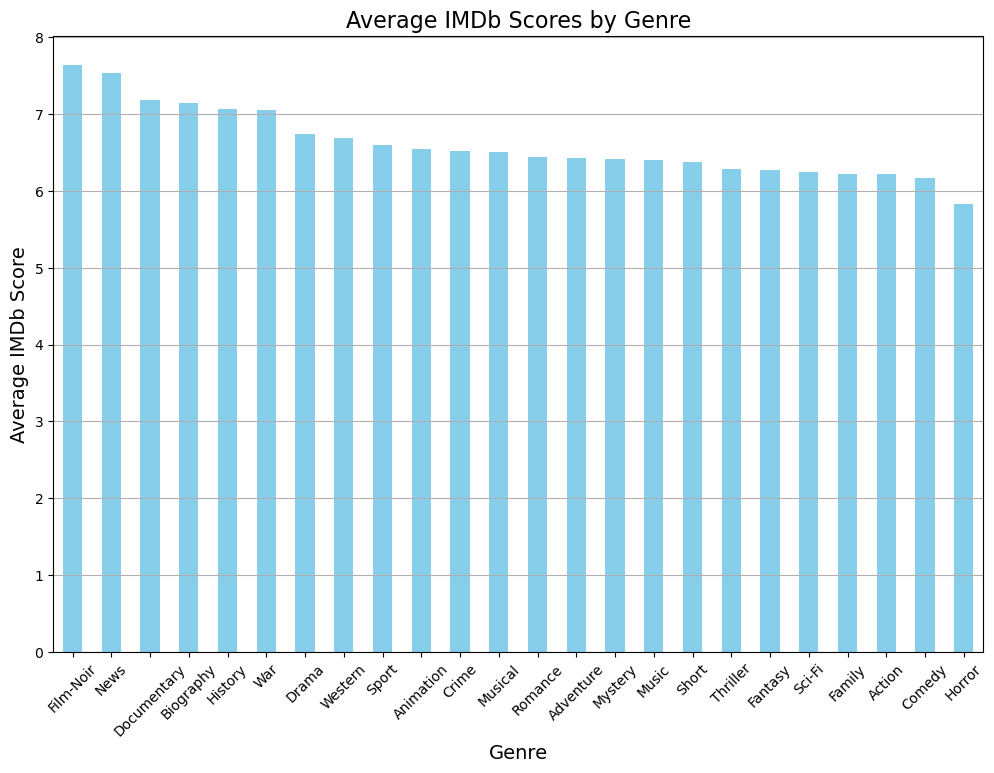

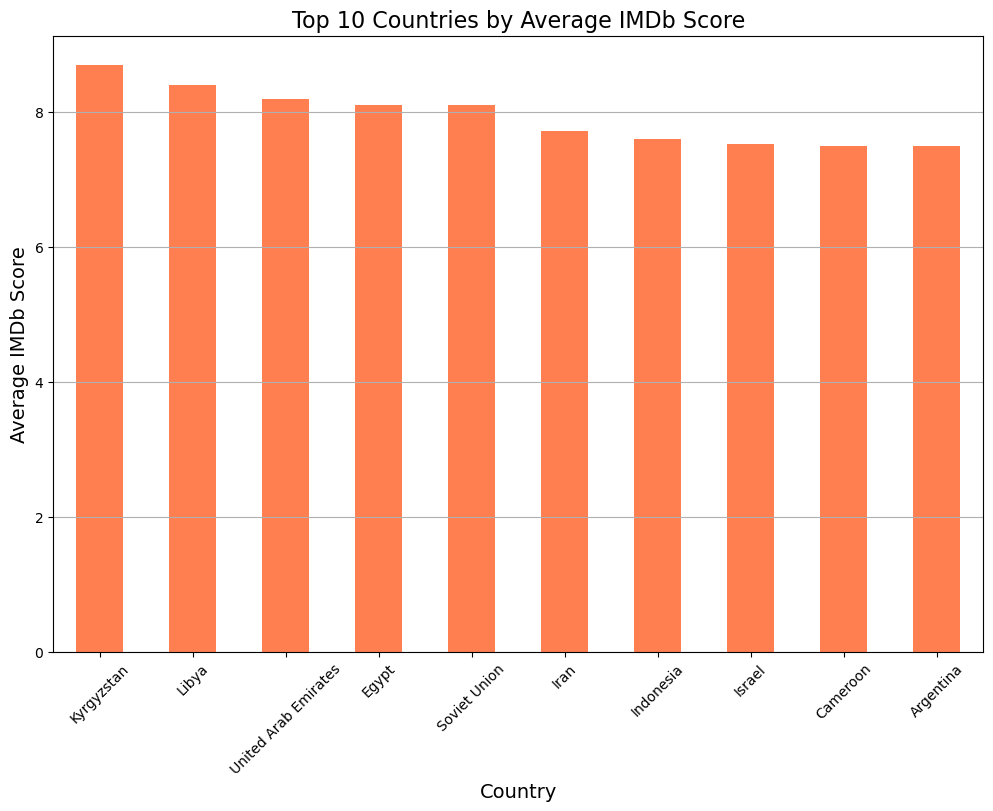

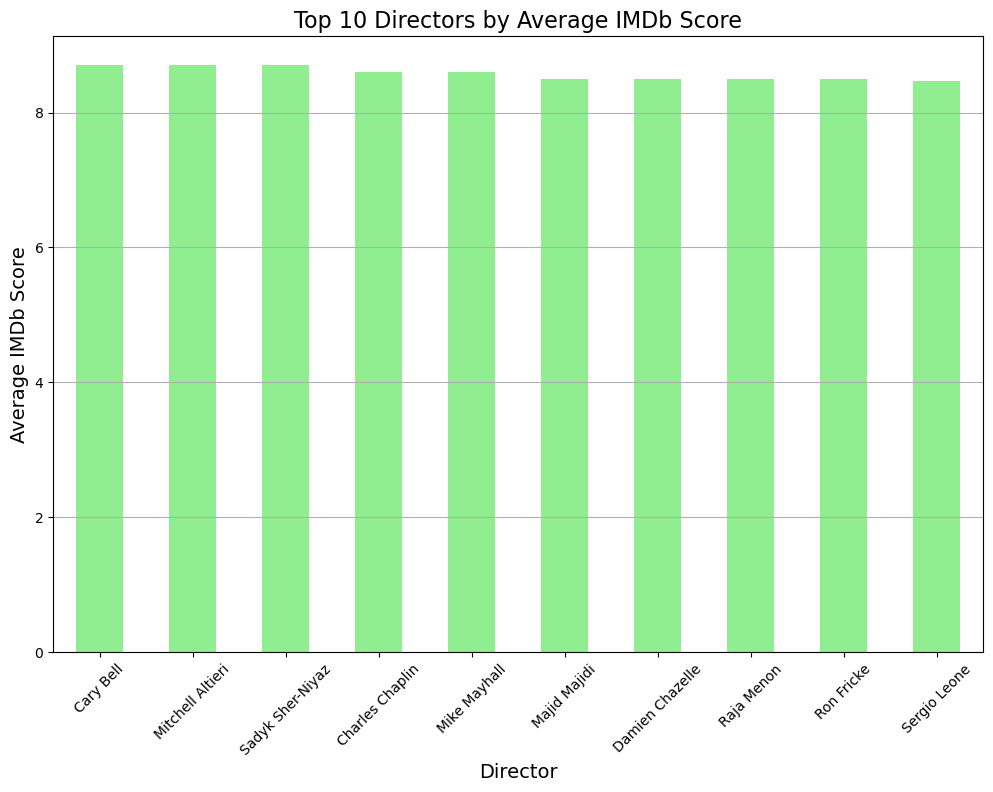

In [4]:
# Load the dataset
movies_df = pd.read_csv(ABS_PATH+'/data/movie_data.csv')


# Filter out rows with missing IMDb scores or years
movies_df = movies_df.dropna(subset=['imdb_score', 'title_year'])

# Group by year and calculate average IMDb scores
imdb_scores_by_year = movies_df.groupby('title_year')['imdb_score'].mean()

# Plot IMDb scores evolution over time
plt.figure(figsize=(12, 8))
plt.plot(imdb_scores_by_year.index, imdb_scores_by_year.values, marker='o', label='Average IMDb Score')
plt.title('Evolution of IMDb Scores Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.grid()
plt.legend()
plt.show()

# Compare IMDb scores across genres
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_expanded = movies_df.explode('genres')
imdb_scores_by_genre = movies_expanded.groupby('genres')['imdb_score'].mean().sort_values(ascending=False)

# Bar plot of average IMDb scores by genre
plt.figure(figsize=(12, 8))
imdb_scores_by_genre.plot(kind='bar', color='skyblue')
plt.title('Average IMDb Scores by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Compare IMDb scores by country
imdb_scores_by_country = movies_df.groupby('country')['imdb_score'].mean().sort_values(ascending=False).head(10)

# Bar plot of average IMDb scores by country
plt.figure(figsize=(12, 8))
imdb_scores_by_country.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Average IMDb Score', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Compare IMDb scores by director
imdb_scores_by_director = movies_df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)

# Bar plot of top directors by average IMDb score
plt.figure(figsize=(12, 8))
imdb_scores_by_director.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Directors by Average IMDb Score', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 5. Evolution of awards

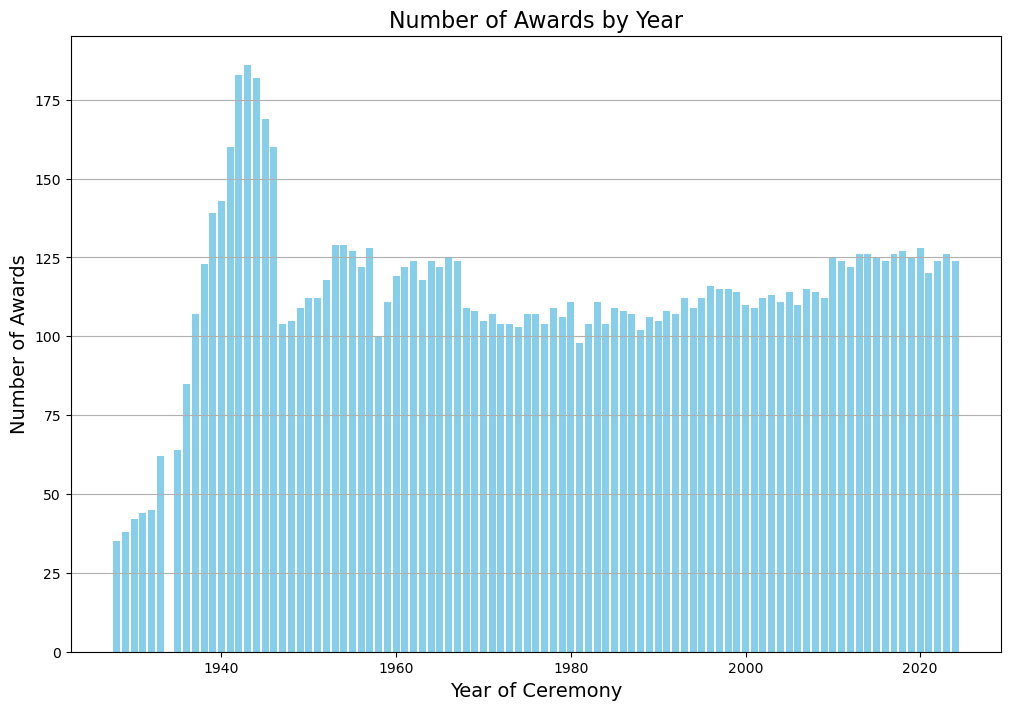

Year with the most awards: 1943 (186 awards)
Year with the fewest awards: 1928 (35 awards)


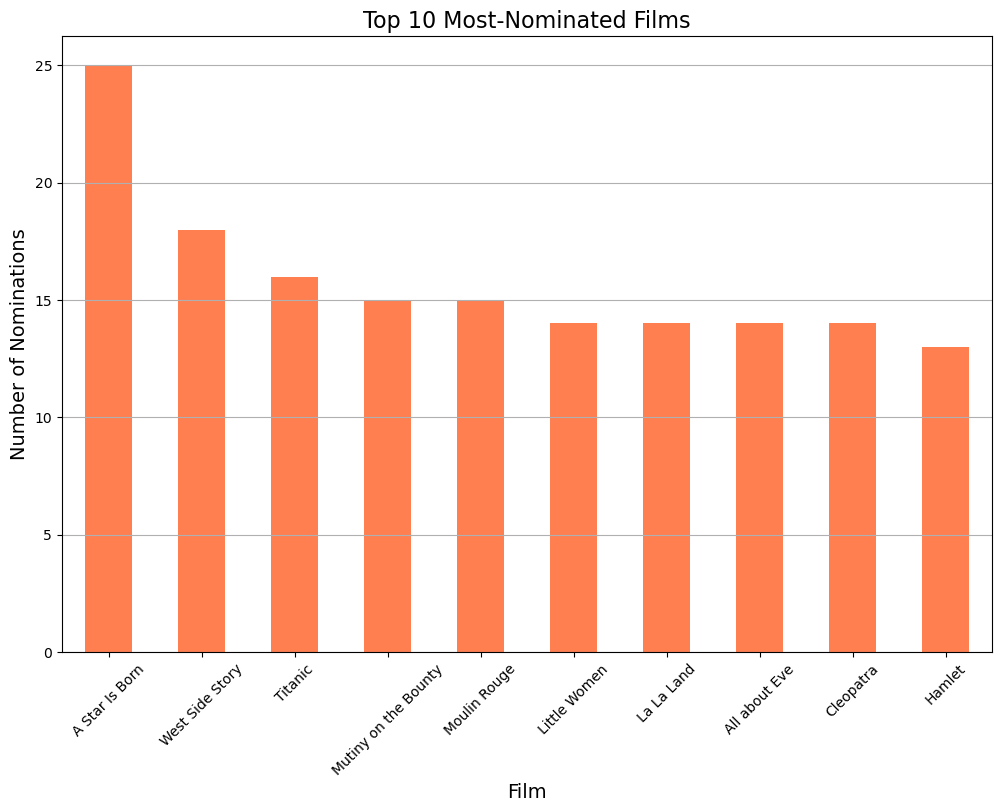

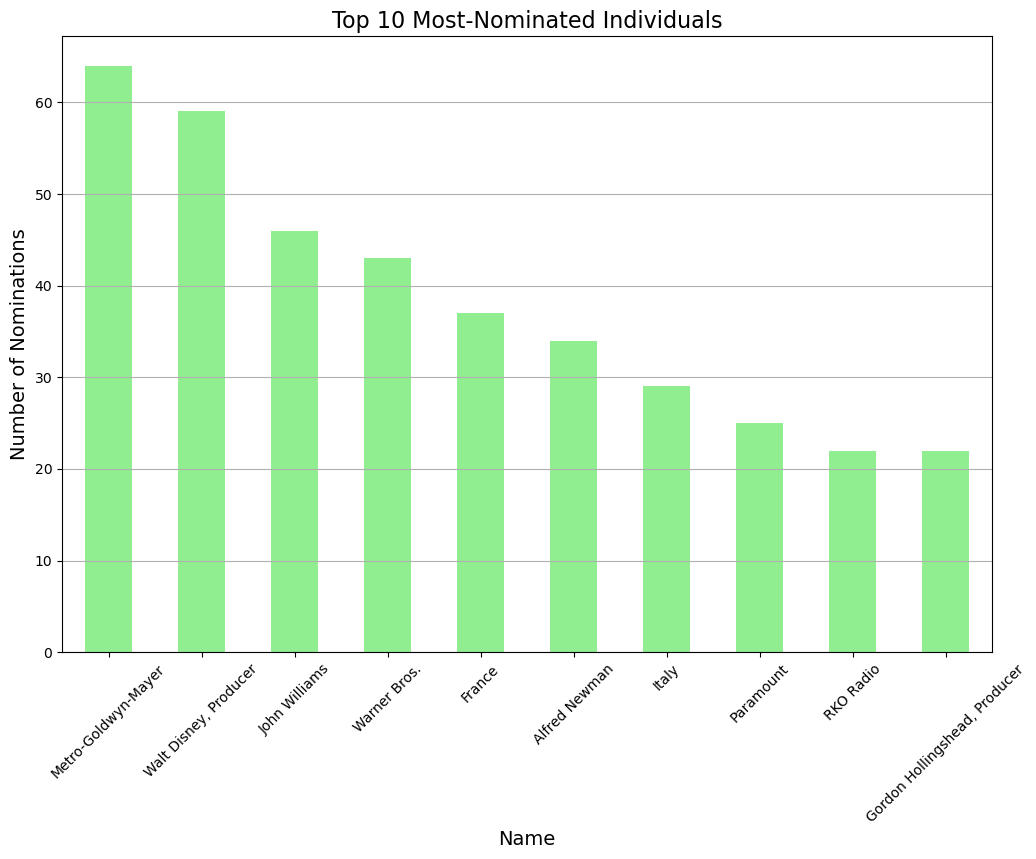

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the awards dataset
awards_df = pd.read_csv(ABS_PATH + '/data/the_oscar_award.csv')

# Analyze years with the most or fewest awards
awards_per_year = awards_df.groupby('year_ceremony').size()

# Plot the number of awards per year
plt.figure(figsize=(12, 8))
plt.bar(awards_per_year.index, awards_per_year.values, color='skyblue')
plt.title('Number of Awards by Year', fontsize=16)
plt.xlabel('Year of Ceremony', fontsize=14)
plt.ylabel('Number of Awards', fontsize=14)
plt.grid(axis='y')
plt.show()

# Identify the years with the most and fewest awards
most_awarded_year = awards_per_year.idxmax()
least_awarded_year = awards_per_year.idxmin()
print(f"Year with the most awards: {most_awarded_year} ({awards_per_year.max()} awards)")
print(f"Year with the fewest awards: {least_awarded_year} ({awards_per_year.min()} awards)")

# Study consistently nominated movies or individuals
nominations_per_film = awards_df.groupby('film').size().sort_values(ascending=False).head(10)
nominations_per_person = awards_df.groupby('name').size().sort_values(ascending=False).head(10)

# Plot top 10 most-nominated films
plt.figure(figsize=(12, 8))
nominations_per_film.plot(kind='bar', color='coral')
plt.title('Top 10 Most-Nominated Films', fontsize=16)
plt.xlabel('Film', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Plot top 10 most-nominated individuals
plt.figure(figsize=(12, 8))
nominations_per_person.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most-Nominated Individuals', fontsize=16)
plt.xlabel('Name', fontsize=14)
plt.ylabel('Number of Nominations', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## 5. Genre presence evolution in awards

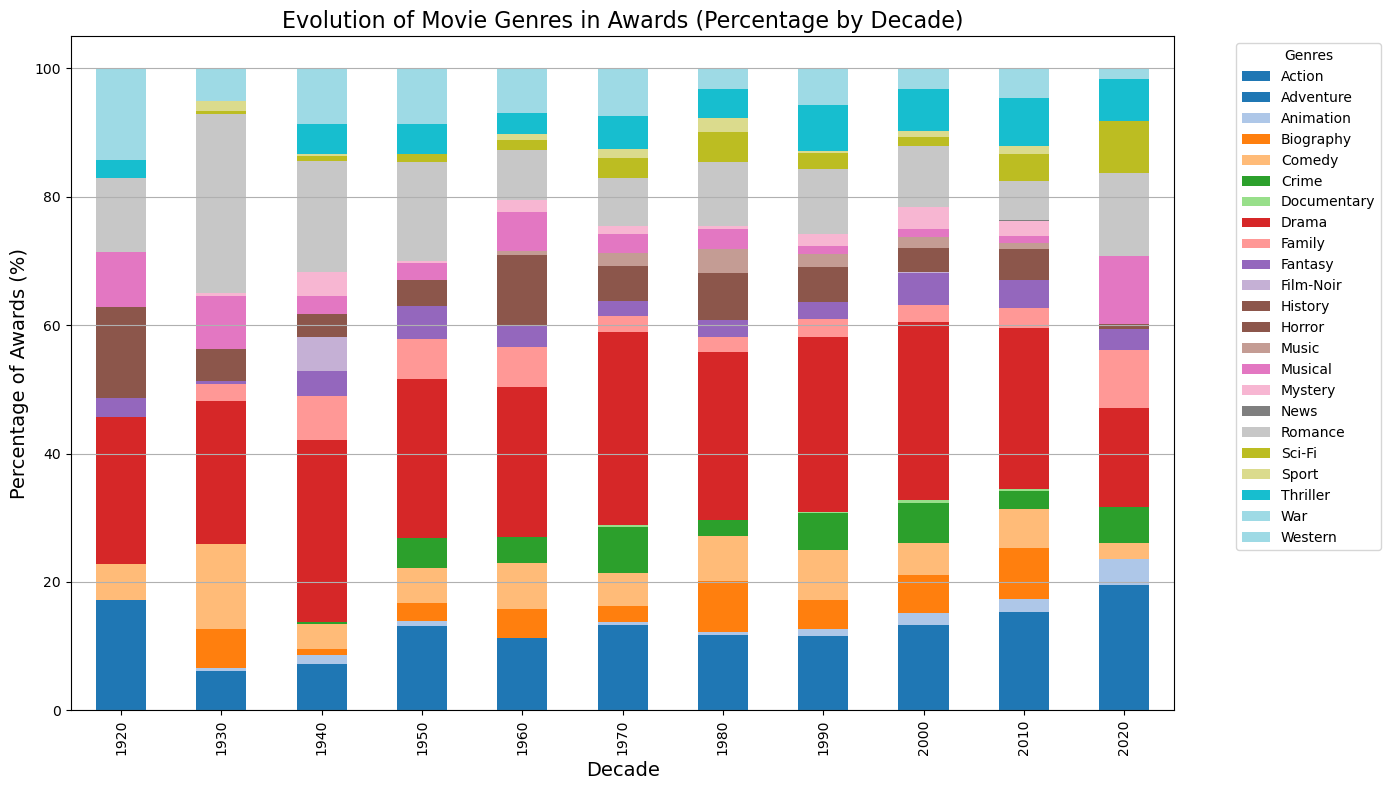

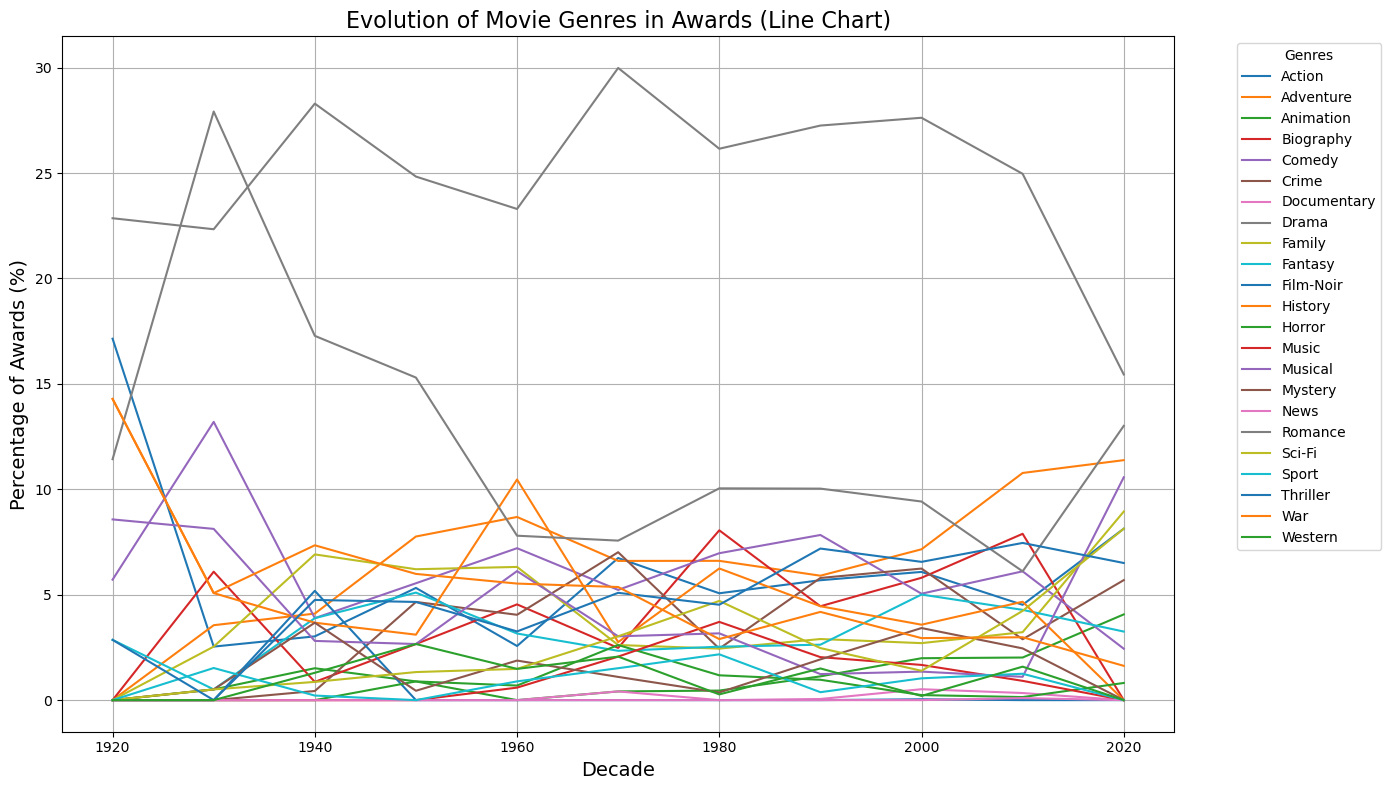

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
movies_df = pd.read_csv(ABS_PATH + '/data/movie_data.csv')  # Movies dataset
awards_df = pd.read_csv(ABS_PATH + '/data/the_oscar_award.csv')  # Awards dataset

# Ensure movie titles are consistent
movies_df['movie_title'] = movies_df['movie_title'].str.strip().str.lower()
awards_df['film'] = awards_df['film'].str.strip().str.lower()

# Merge datasets by movie title
merged_df = awards_df.merge(movies_df, left_on='film', right_on='movie_title', how='inner')

# Extract and expand genres
merged_df['genres'] = merged_df['genres'].str.split('|')
merged_expanded = merged_df.explode('genres')

# Add a decade column based on the year of the ceremony
merged_expanded['decade'] = (merged_expanded['year_ceremony'] // 10) * 10

# Group by decade and genre to count awards
genre_award_trends = merged_expanded.groupby(['decade', 'genres']).size().unstack(fill_value=0)

# Normalize genre awards by decade (percentage of total awards)
genre_award_percentages = genre_award_trends.div(genre_award_trends.sum(axis=1), axis=0) * 100

# Plot genre trends over decades (stacked bar chart)
genre_award_percentages.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Evolution of Movie Genres in Awards (Percentage by Decade)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Percentage of Awards (%)', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

# Plot genre trends over decades (line chart)
plt.figure(figsize=(14, 8))
for genre in genre_award_percentages.columns:
    plt.plot(genre_award_percentages.index, genre_award_percentages[genre], label=genre)

plt.title('Evolution of Movie Genres in Awards (Line Chart)', fontsize=16)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Percentage of Awards (%)', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

## 7. Winner vs non-winner in awards

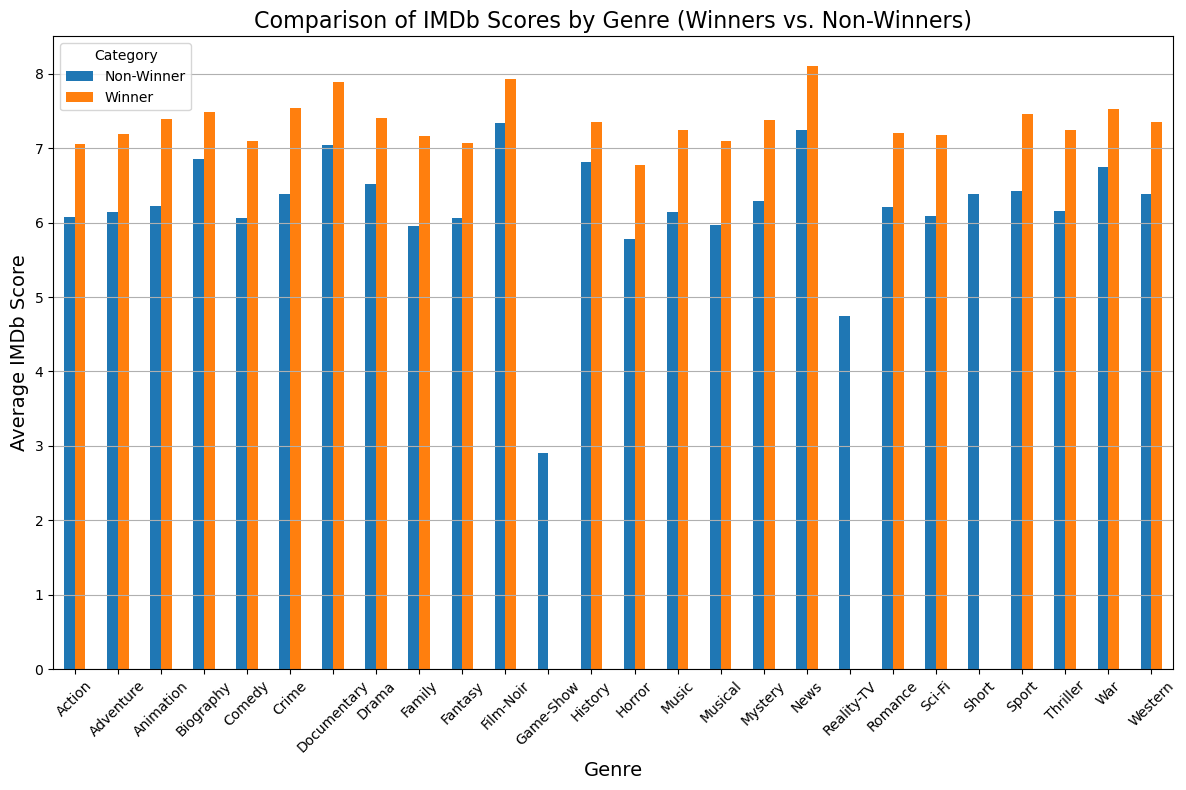

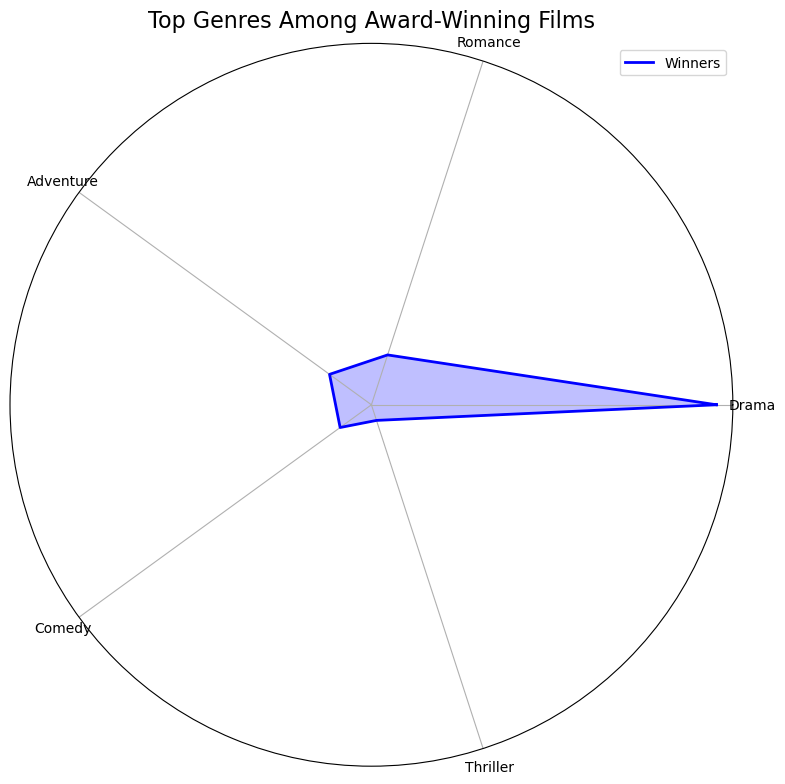

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import numpy as np

# Load datasets
movies_df = pd.read_csv(ABS_PATH + '/data/movie_data.csv')  # Movies dataset
awards_df = pd.read_csv(ABS_PATH + '/data/the_oscar_award.csv')  # Awards dataset

# Normalize movie titles for merging
movies_df['movie_title'] = movies_df['movie_title'].str.strip().str.lower()
awards_df['film'] = awards_df['film'].str.strip().str.lower()

# Split genres into a list
movies_df['genres'] = movies_df['genres'].str.split('|')

# Merge datasets to associate awards with movies
merged_df = awards_df.merge(movies_df, left_on='film', right_on='movie_title', how='inner')

# Create a column to label award winners
movies_df['is_winner'] = movies_df['movie_title'].isin(merged_df['movie_title']).astype(int)

# Compare winners and non-winners by IMDb score and genre
movies_expanded = movies_df.explode('genres')  # Expand genres for analysis
genre_comparison = movies_expanded.groupby(['genres', 'is_winner'])['imdb_score'].mean().unstack()

# Plot average IMDb scores by genre for winners vs. non-winners
genre_comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of IMDb Scores by Genre (Winners vs. Non-Winners)', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.legend(['Non-Winner', 'Winner'], title='Category')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Spider chart for top genres
# Prepare data for spider chart
top_genres = movies_expanded[movies_expanded['is_winner'] == 1]['genres'].value_counts().head(5)
angles = np.linspace(0, 2 * np.pi, len(top_genres), endpoint=False).tolist()
angles += angles[:1]  # Close the plot

values = list(top_genres.values)
values += values[:1]

# Create spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.plot(angles, values, color='blue', linewidth=2, label='Winners')
ax.fill(angles, values, color='blue', alpha=0.25)

ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_genres.index)

plt.title('Top Genres Among Award-Winning Films', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

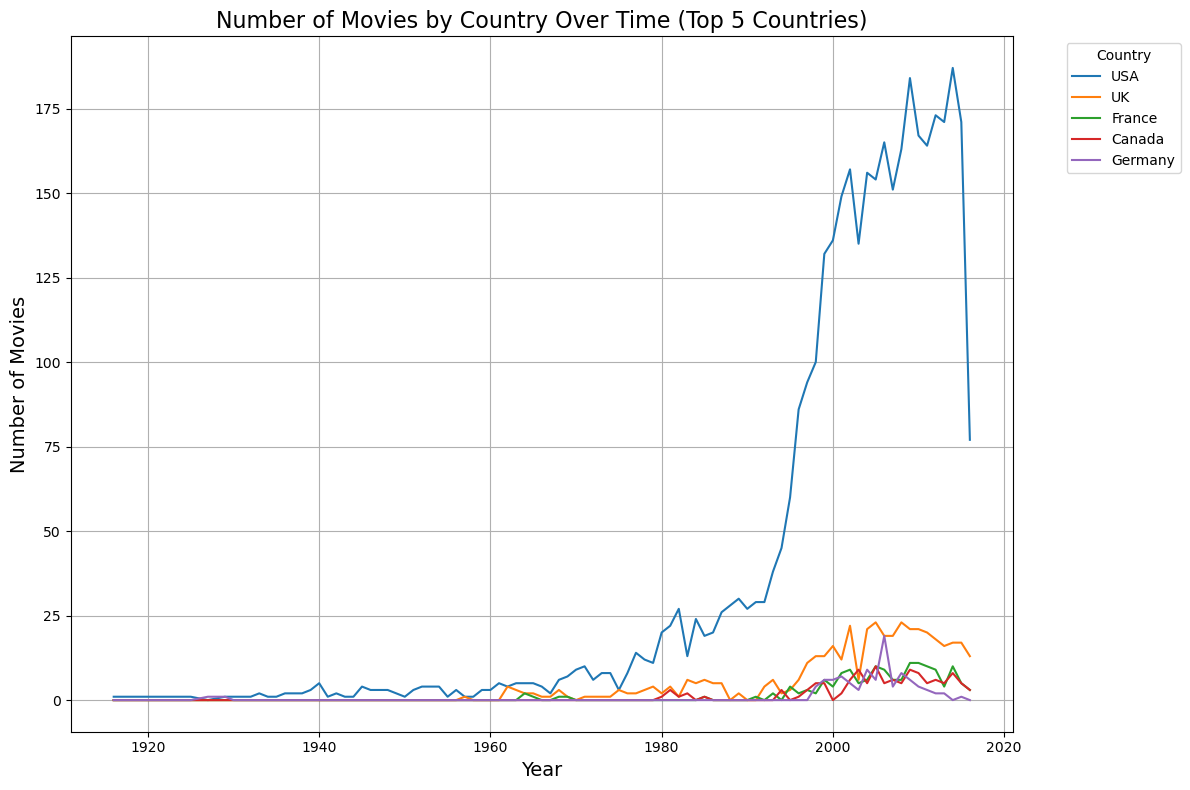

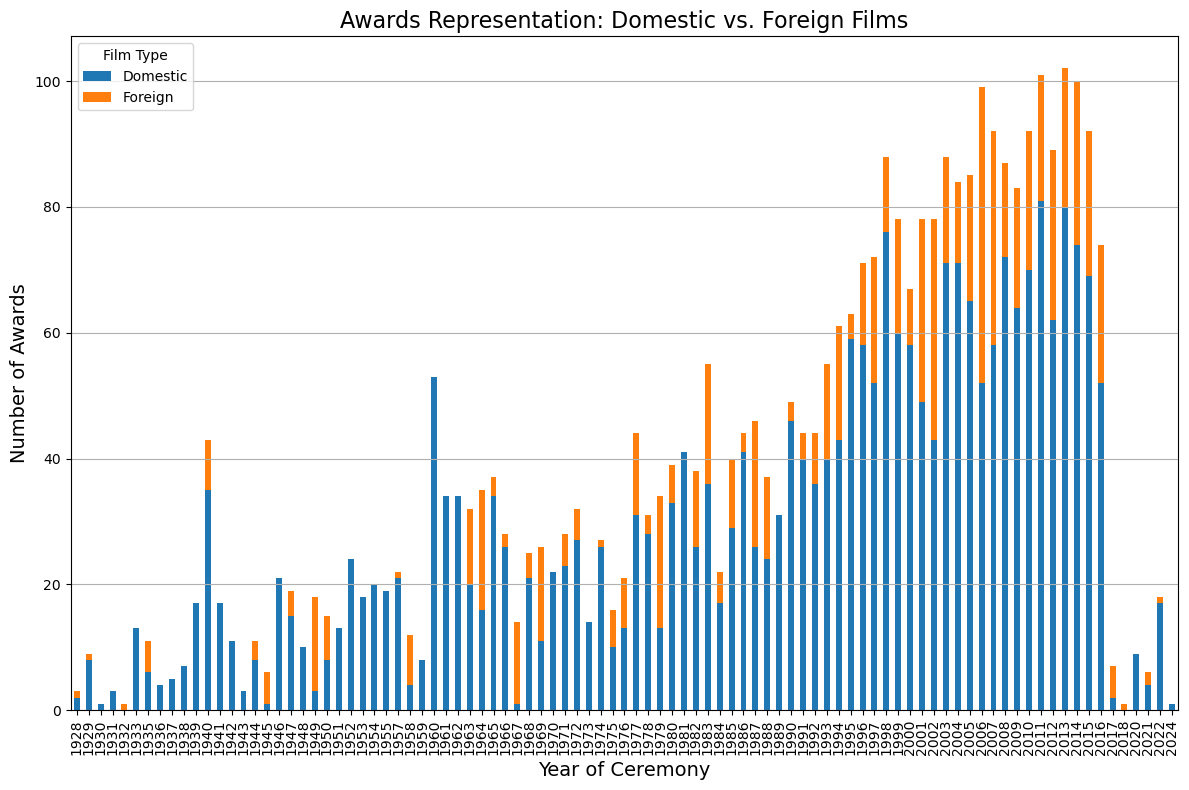

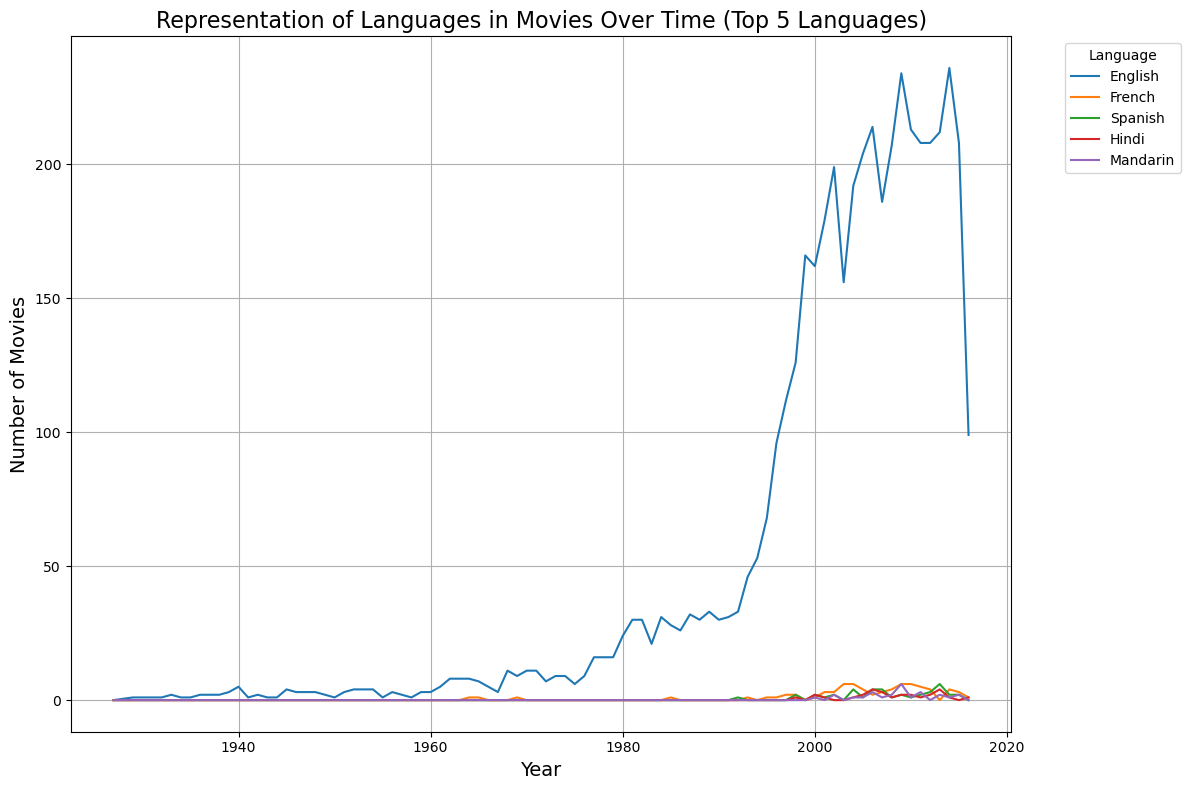

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
movies_df = pd.read_csv(ABS_PATH + '/data/movie_data.csv')  # Movies dataset
awards_df = pd.read_csv(ABS_PATH + '/data/the_oscar_award.csv')  # Awards dataset

# Normalize titles for merging
movies_df['movie_title'] = movies_df['movie_title'].str.strip().str.lower()
awards_df['film'] = awards_df['film'].str.strip().str.lower()

# Merge datasets to analyze awarded movies
merged_df = awards_df.merge(movies_df, left_on='film', right_on='movie_title', how='inner')

# 1. Analyze number of movies by country over time
movies_by_country = movies_df.groupby(['title_year', 'country']).size().unstack(fill_value=0)

# Line plot: Movies by country over time (Top 5 countries)
top_countries = movies_by_country.sum(axis=0).sort_values(ascending=False).head(5).index
movies_by_country_top = movies_by_country[top_countries]

movies_by_country_top.plot(figsize=(12, 8))
plt.title('Number of Movies by Country Over Time (Top 5 Countries)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# 2. Analyze diversity in awards (foreign vs. domestic films)
# Create a column to classify foreign films
merged_df['is_foreign'] = merged_df['country'] != 'USA'

foreign_awards_trend = merged_df.groupby(['year_ceremony', 'is_foreign']).size().unstack(fill_value=0)
foreign_awards_trend.columns = ['Domestic', 'Foreign']

# Stacked bar chart: Foreign vs. domestic films winning awards over time
foreign_awards_trend.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Awards Representation: Domestic vs. Foreign Films', fontsize=16)
plt.xlabel('Year of Ceremony', fontsize=14)
plt.ylabel('Number of Awards', fontsize=14)
plt.legend(title='Film Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Analyze diversity in language representation over time
movies_by_language = movies_df.groupby(['title_year', 'language']).size().unstack(fill_value=0)

# Line plot: Language trends over time (Top 5 languages)
top_languages = movies_by_language.sum(axis=0).sort_values(ascending=False).head(5).index
movies_by_language_top = movies_by_language[top_languages]

movies_by_language_top.plot(figsize=(12, 8))
plt.title('Representation of Languages in Movies Over Time (Top 5 Languages)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# 4. Minority Representation (custom category, if data exists)
# Assuming awards_df contains a column 'minority_group' (True/False or similar)
if 'minority_group' in awards_df.columns:
    minority_trend = awards_df.groupby(['year_ceremony', 'minority_group']).size().unstack(fill_value=0)
    minority_trend.columns = ['Non-Minority', 'Minority']

    # Stacked bar chart: Minority vs. Non-Minority winners over time
    minority_trend.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Representation of Minority Groups in Awards', fontsize=16)
    plt.xlabel('Year of Ceremony', fontsize=14)
    plt.ylabel('Number of Awards', fontsize=14)
    plt.legend(title='Group')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

Top actors per decade:
decade
1910          John Newton
1920      Alyson Hannigan
1930      Andrew Bujalski
1940         Alan Rickman
1950       Akshaye Khanna
1960    Robert Downey Jr.
1970      Bokeem Woodbine
1980          Colin Firth
1990    Denzel Washington
2000       Robert De Niro
2010           Matt Damon
dtype: object

Top directors per decade:
decade
1910           D.W. Griffith
1920              Fritz Lang
1930             Frank Capra
1940        Alfred Hitchcock
1950          Fred Zinnemann
1960         Stanley Kubrick
1970    Francis Ford Coppola
1980          John Carpenter
1990         Joel Schumacher
2000          Clint Eastwood
2010            Ridley Scott
dtype: object


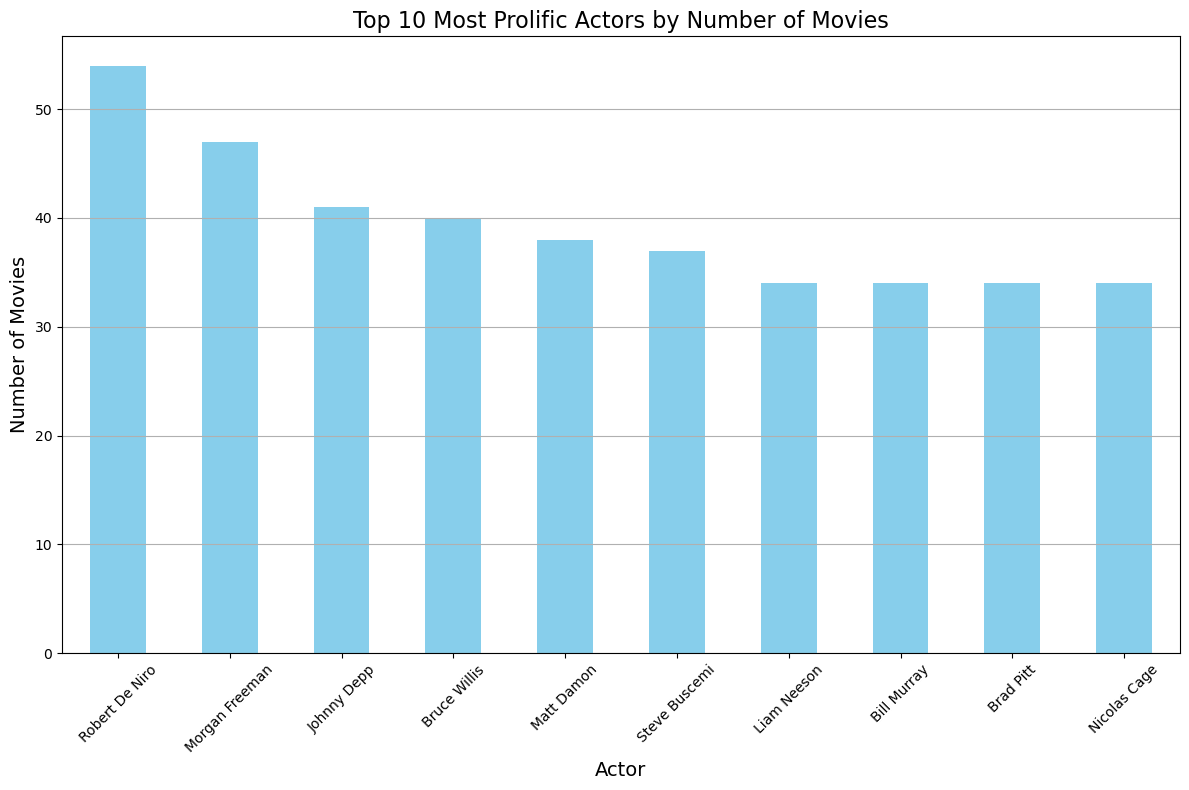

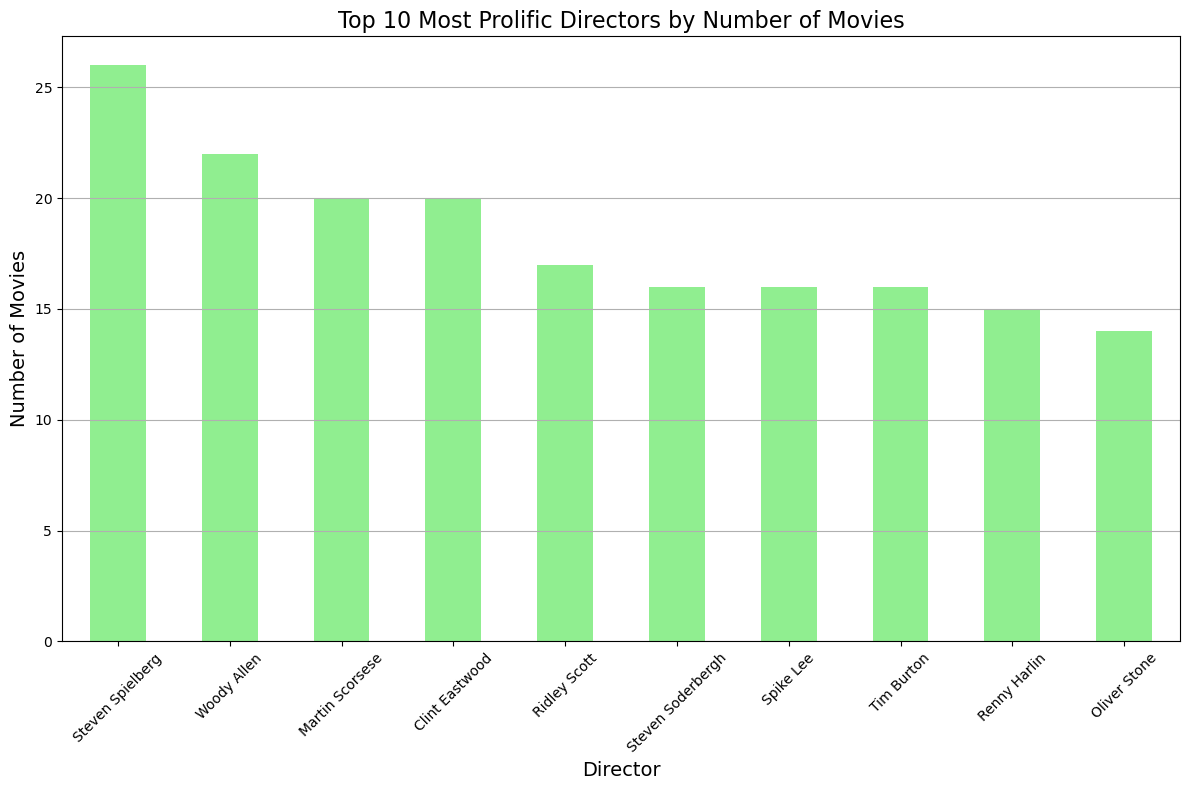

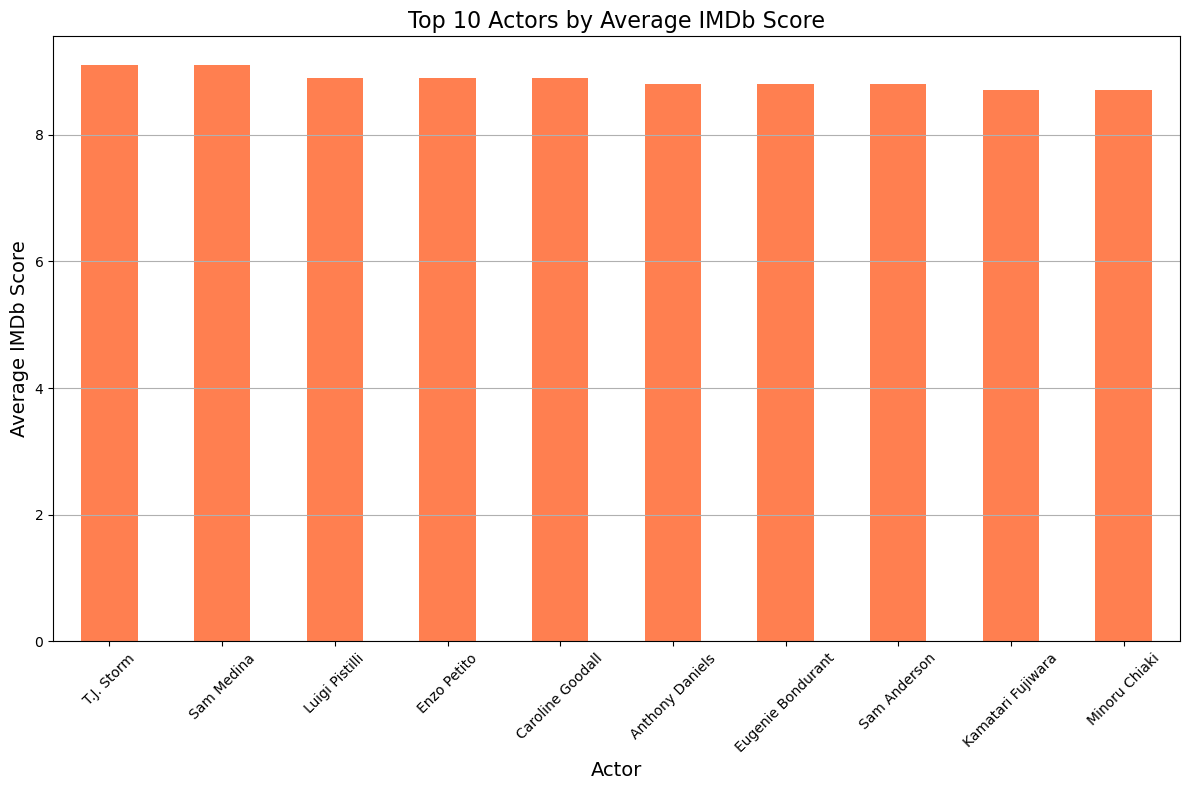

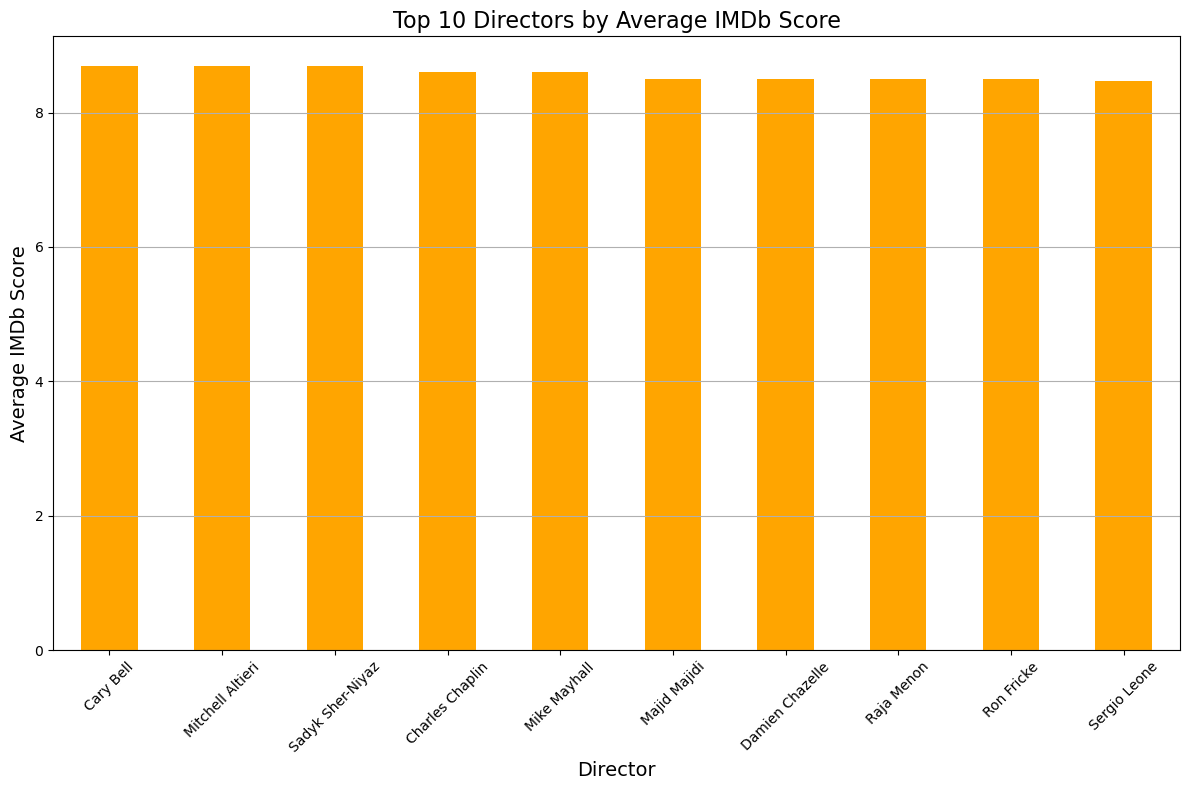

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
movies_df = pd.read_csv(ABS_PATH + '/data/movie_data.csv')  # Movies dataset

# Drop missing `title_year` values and ensure numerical type
movies_df = movies_df.dropna(subset=['title_year'])
movies_df['title_year'] = movies_df['title_year'].astype(int)

# Add a `decade` column to group by decades
movies_df['decade'] = (movies_df['title_year'] // 10) * 10

# Combine actor columns into a single DataFrame
actor_columns = ['actor_1_name', 'actor_2_name', 'actor_3_name']
actors_df = movies_df[actor_columns].melt(value_name='actor').dropna(subset=['actor'])

# Merge actors with movie data to include decade information
actors_with_decade = actors_df.merge(
    movies_df[['movie_title', 'decade']], left_index=True, right_index=True
)

# Group by decade and actor to count movies
actors_per_decade = actors_with_decade.groupby(['decade', 'actor']).size().unstack(fill_value=0)

# Identify the most prolific actor per decade
top_actors_per_decade = actors_per_decade.idxmax(axis=1)

# Group by decade and director to count movies
directors_per_decade = movies_df.groupby(['decade', 'director_name']).size().unstack(fill_value=0)

# Identify the most prolific director per decade
top_directors_per_decade = directors_per_decade.idxmax(axis=1)

# Print results
print("Top actors per decade:")
print(top_actors_per_decade)

print("\nTop directors per decade:")
print(top_directors_per_decade)

# Visualizations: Top 10 Actors and Directors
# Top 10 actors by number of movies
top_actors = actors_df['actor'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_actors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Prolific Actors by Number of Movies', fontsize=16)
plt.xlabel('Actor', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Top 10 directors by number of movies
top_directors = movies_df['director_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
top_directors.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Most Prolific Directors by Number of Movies', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Average IMDb scores of top actors and directors
actors_avg_score = movies_df.melt(
    id_vars=['imdb_score'], value_vars=actor_columns, value_name='actor'
).dropna(subset=['actor']).groupby('actor')['imdb_score'].mean().sort_values(ascending=False).head(10)

directors_avg_score = movies_df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)

# Plot top 10 actors by average IMDb score
plt.figure(figsize=(12, 8))
actors_avg_score.plot(kind='bar', color='coral')
plt.title('Top 10 Actors by Average IMDb Score', fontsize=16)
plt.xlabel('Actor', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot top 10 directors by average IMDb score
plt.figure(figsize=(12, 8))
directors_avg_score.plot(kind='bar', color='orange')
plt.title('Top 10 Directors by Average IMDb Score', fontsize=16)
plt.xlabel('Director', fontsize=14)
plt.ylabel('Average IMDb Score', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Top actors per decade:
decade
1910          John Newton
1920      Alyson Hannigan
1930      Andrew Bujalski
1940         Alan Rickman
1950       Akshaye Khanna
1960    Robert Downey Jr.
1970      Bokeem Woodbine
1980          Colin Firth
1990    Denzel Washington
2000       Robert De Niro
2010           Matt Damon
dtype: object

Top directors per decade:
decade
1910           D.W. Griffith
1920              Fritz Lang
1930             Frank Capra
1940        Alfred Hitchcock
1950          Fred Zinnemann
1960         Stanley Kubrick
1970    Francis Ford Coppola
1980          John Carpenter
1990         Joel Schumacher
2000          Clint Eastwood
2010            Ridley Scott
dtype: object


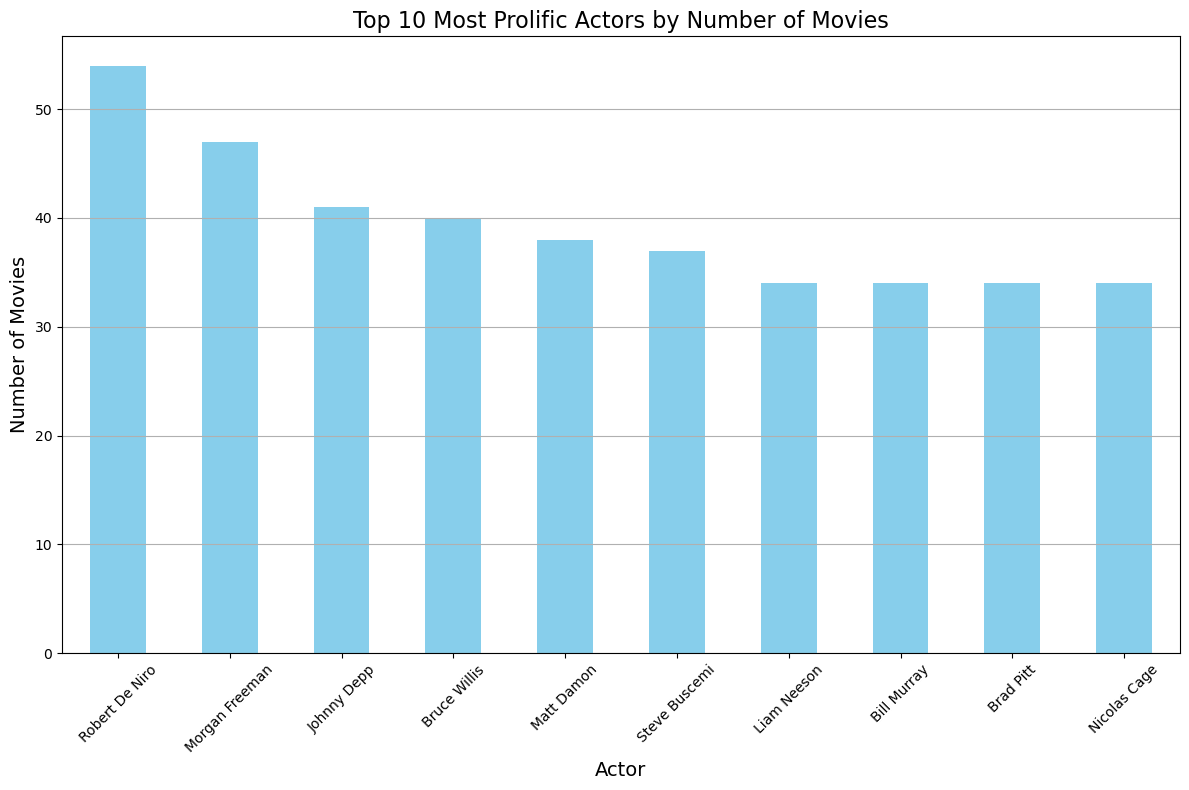

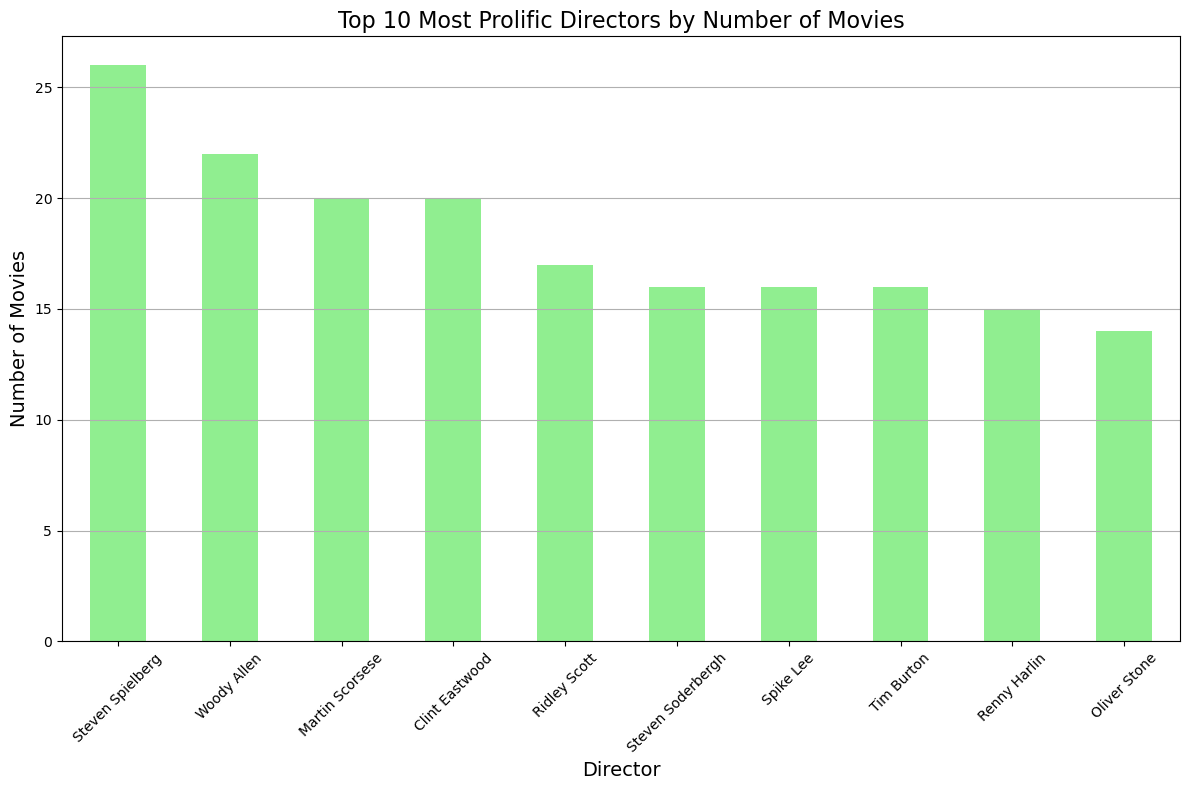

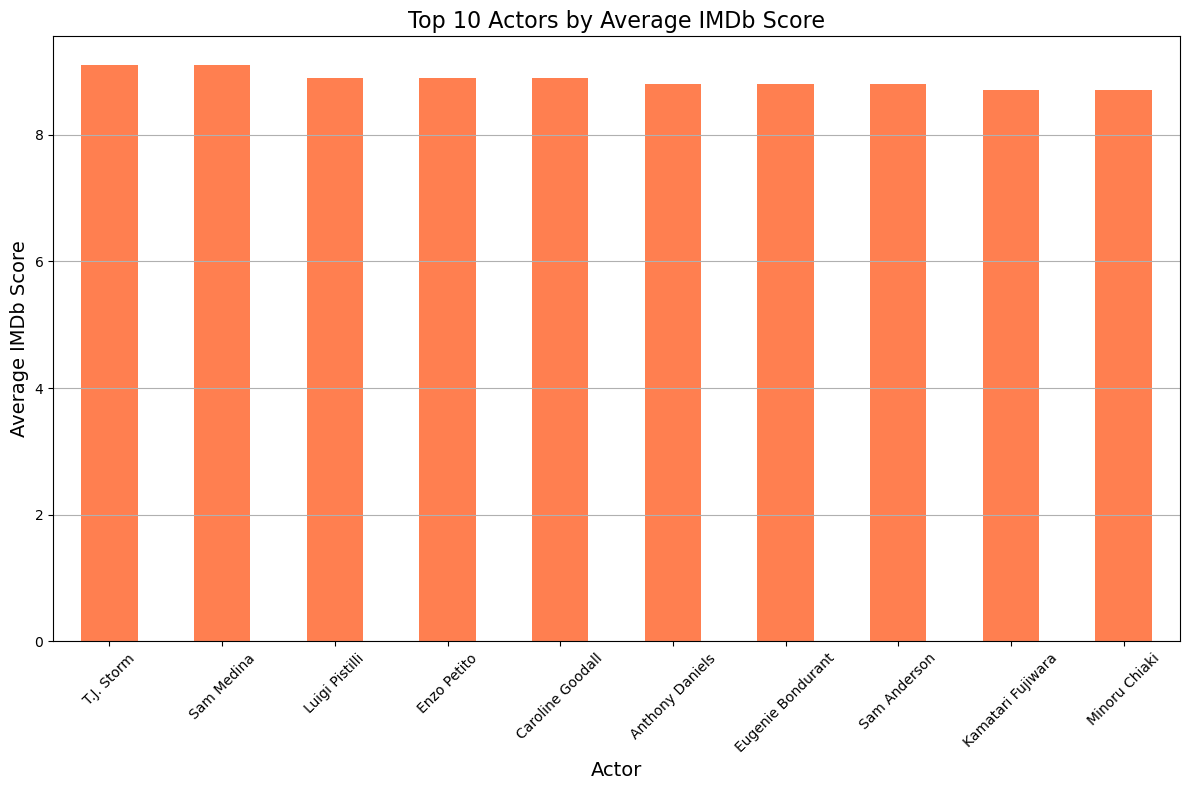

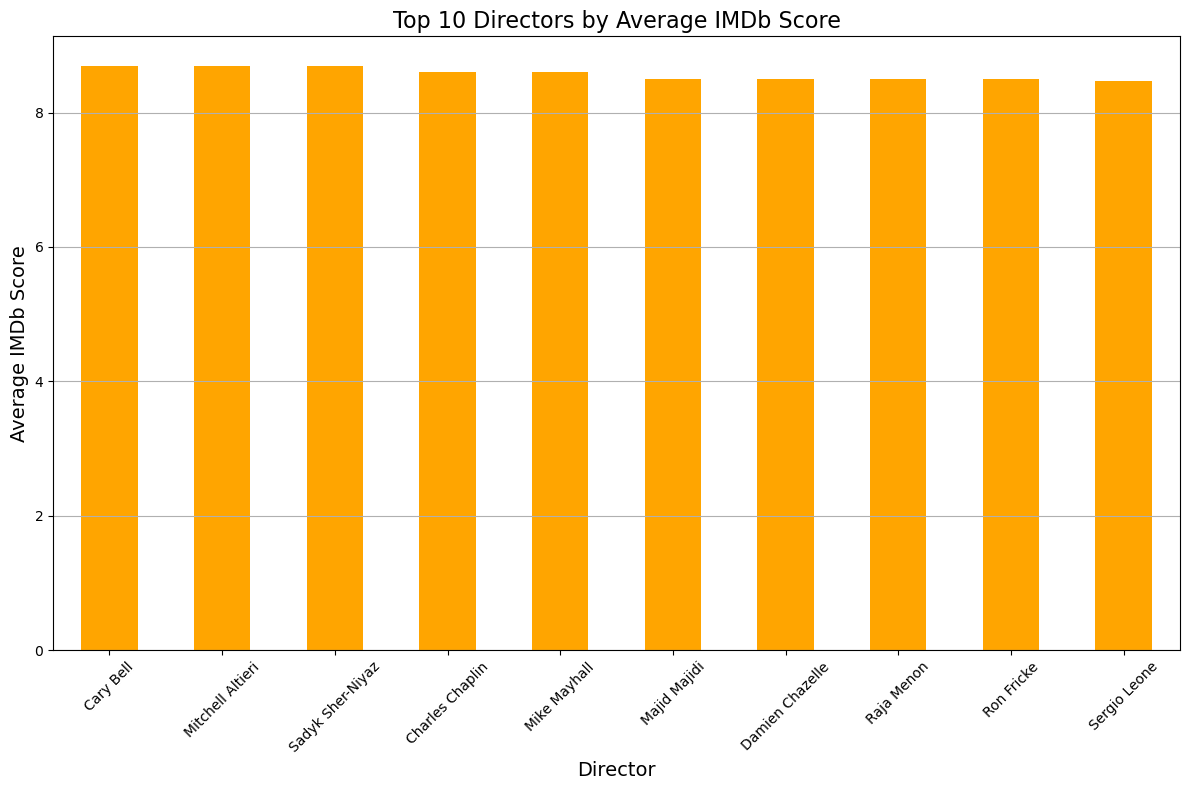

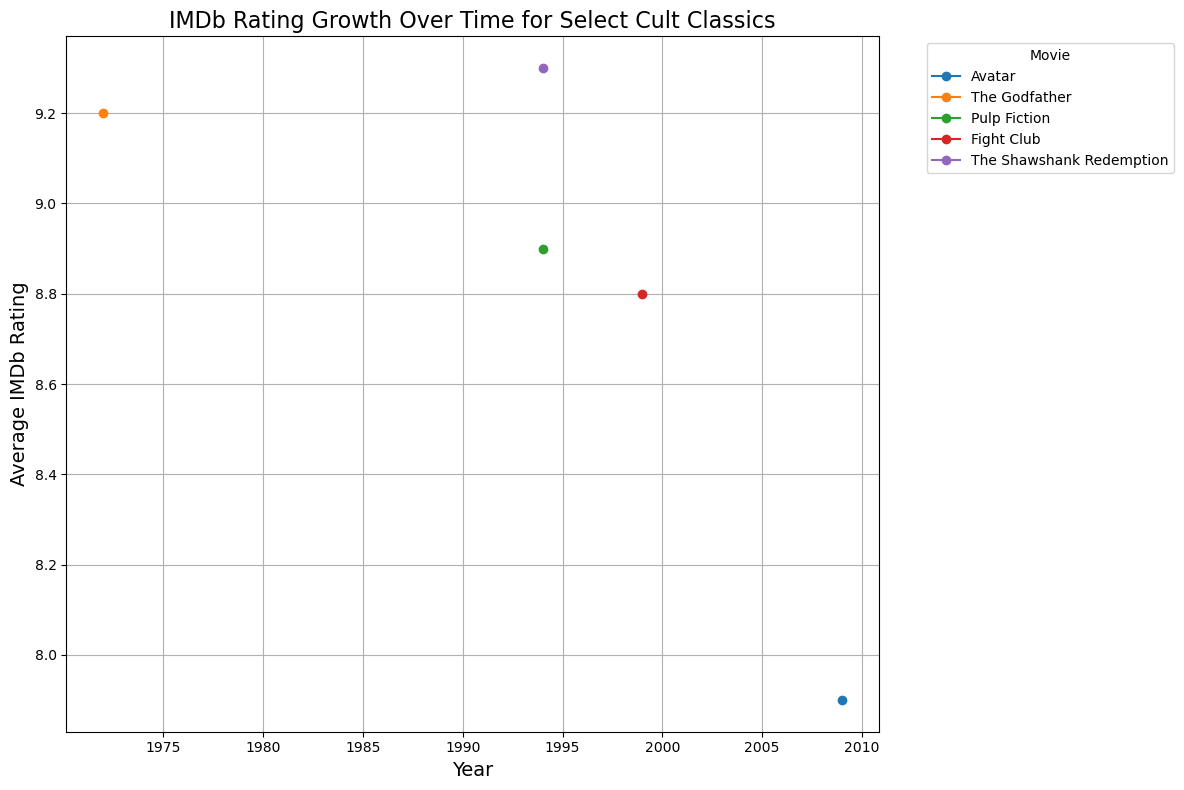

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
movies_df = pd.read_csv(ABS_PATH + '/data/movie_data.csv')  # Movies dataset
awards_df = pd.read_csv(ABS_PATH + '/data/the_oscar_award.csv')  # Awards dataset

# Normalize movie titles for consistency
movies_df['movie_title'] = movies_df['movie_title'].str.strip().str.lower()
awards_df['film'] = awards_df['film'].str.strip().str.lower()

# Select cult classics manually or based on criteria
cult_classics = ["avatar", "the godfather", "pulp fiction", "fight club", "the shawshank redemption"]

# Filter the movies dataset for the selected cult classics
cult_classics_df = movies_df[movies_df['movie_title'].isin(cult_classics)]

# Ensure title_year and imdb_score are not missing
cult_classics_df = cult_classics_df.dropna(subset=['title_year', 'imdb_score'])
cult_classics_df['title_year'] = cult_classics_df['title_year'].astype(int)

# Group by title_year and movie_title to calculate average IMDb scores per year
rating_growth = cult_classics_df.groupby(['title_year', 'movie_title'])['imdb_score'].mean().reset_index()

# Plot IMDb rating growth over time for cult classics
plt.figure(figsize=(12, 8))
for movie in cult_classics:
    movie_data = rating_growth[rating_growth['movie_title'] == movie]
    plt.plot(movie_data['title_year'], movie_data['imdb_score'], marker='o', label=movie.title())

plt.title('IMDb Rating Growth Over Time for Select Cult Classics', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average IMDb Rating', fontsize=14)
plt.legend(title='Movie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()